### Часть третья: Анализ датасет c Kaggle.com#

In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#### Прочитайте csv файл (используйте функцию read_csv)

In [18]:
data = pd.read_csv("bestsellers with categories.csv")

#### Выведите первый пять строчек (используется функцию head)

In [14]:
print(data.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


#### Выведите размеры датасета (используйте атрибут shape)

In [16]:
print(data.shape)

(550, 7)


#### Ответ: О скольки книгах хранит данные датасет?

550

#### Для упрощения последующей работы, давайте немного подправим названия переменных.

In [27]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(data.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


### Первичное исследование данных

#### Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)


In [23]:
print(data.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


#### Ответ: Есть ли в каких либо переменных пропуски? (Да/Нет)

Ніт

#### Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

In [25]:
print(data['genre'].unique())

['Non Fiction' 'Fiction']


#### Ответ: Какие есть уникальные жанры?

Non Fiction, Fiction

#### Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

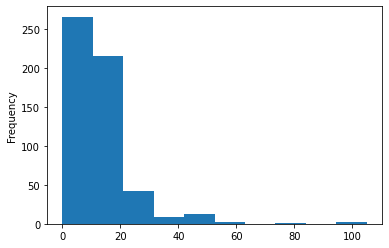

In [38]:
data['price'].plot(kind='hist')
plt.show()

#### Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)

In [64]:
print(f"max ={data['price'].max()} \n\
min ={data['price'].min()} \n\
mean ={data['price'].mean()} \n\
median ={data['price'].median()}")

max =105 
min =0 
mean =13.1 
median =11.0


#### Ответ: Mаксимальная цена?

105

#### Ответ: Минимальная цена?

0

#### Ответ: Средняя цена?

13.1

#### Ответ: Медианная цена?

11.0

### Поиск и сортировка данных

#### Ответ: Какой рейтинг в датасете наивысший? Ответ:

4.9

In [65]:
print(data['user_rating'].max())

4.9


#### Ответ: Сколько книг имеют такой рейтинг? Ответ:

52

In [80]:
print(data[data['user_rating']== 4.9].shape)

(52, 7)


#### Ответ: У какой книги больше всего отзывов? Ответ:

 Where the Crawdads Sing    

In [84]:
print(data[data['reviews'] == data['reviews'].max()]['name'])

534    Where the Crawdads Sing
Name: name, dtype: object


#### Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)?

Publication Manual of the American Psychologic...

In [106]:
most_rate_2015 = data[data['year'] == 2015].sort_values(by='user_rating')[0:50]
print(most_rate_2015[most_rate_2015['price'] == most_rate_2015['price'].max()]['name'])

277    Publication Manual of the American Psychologic...
Name: name, dtype: object


#### Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:

20

In [103]:
most_rate_2010 = data[data['year'] == 2010].sort_values(by='user_rating')[0:50]
print(most_rate_2010[most_rate_2010['genre'] == 'Fiction'].count())

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64


#### Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:

In [132]:
a = data['year'].isin({'year': [2010, 2011]})
#     & data['year'] == '2010' | data['year'] == '2011']
print(a)

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Name: year, Length: 550, dtype: bool


#### И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).

#### Ответ: Какая книга последняя в отсортированном списке? Ответ:

#### Агрегирование данных и соединения таблиц#

#### Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

#### Ответ: Максимальная цена для жанра Fiction: Ответ

#### Ответ: Минимальная цена для жанра Fiction: Ответ

#### Ответ: Максимальная цена для жанра Non Fiction: Ответ

#### Ответ: Минимальная цена для жанра Non Fiction: Ответ

#### Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

#### Ответ: Какой размерности вышла таблица? Ответ:

#### Ответ: У какого автора больше всего книг? Ответ:

#### Ответ: Сколько книг у этого автора? Ответ:

#### Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные

#### Ответ: У какого автора средний рейтинг минимальный? Ответ:

#### Ответ: Какой у этого автора средний рейтинг? Ответ:

#### Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

#### Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

#### Ответ: Какой автор первый в списке?